In [27]:
import numpy as np
import pandas as pd

df = pd.read_excel('Copy of App_By status.XLSX',sheet_name=0)

# The Problem:
One of the biggest issues facing the Hispanic Counseling Center, a mental health agency centered in Hempstead, NY is an excessive amount of clients not showing up to appointments without any type of notice in advance. 

When a client misses an appointment in this manner, the agency pays the therapist for that time slot essentially wasting money as well as time that could've been allocated to another client. In January-June 2019, HCC had 1849 "No Show" appointments costing the agency roughly 216,333 of dollars.

(117 hourly rate X #-No-Show-Appointments)
(This is an estimate based on average hourly rate for therapist)

## Solution:
The goal in this study is to try and find underlying patterns in clients based on demographic, geographical and appointment history to assess if certain variables play an effect on the likelihood of a client provide the agency a foundation to minimize this issue and save money. 

# Fix Column names and Drop unnecessary Columns

In [28]:
cols_to_drop = ['addr1','addr2','date_of_birth','name','diag_1','diag_2','diag_3']

mapping = {'appt_confirmed':'confirm',
           'appt_status_desc':'status',
           'appt_time_only':'time',
           'appt_date_only':'date',
           'provider_name':'therapist',
           'service_name': 'type'}
df.drop(cols_to_drop,axis=1,inplace=True)
df.rename(mapping, axis=1, inplace=True)

In [29]:
df.head()

,account,confirm,status,date,time,city,zip,sex,type,therapist,age
0,100017,N,No Show,01-28-2019,14:00,HEMPSTEAD,11550.0,M,MH INTAKE-90791,"VAZQUEZ, MSW,-BI, CASAC-T,LIDUVINA",59
1,100072,Y,Seen/Billed,01-04-2019,15:30,UNIONDALE,11566.0,F,MH IND 30MIN-90832,"STANTON, LCSW,ALEXANDRA",60
2,100072,Y,Seen/Billed,01-07-2019,15:00,UNIONDALE,11566.0,F,MH PSY FOLLOW UP 15MIN-99213,"VITAL-HERNE, MD,JACQUES",60
3,100072,N,Seen/Billed,01-11-2019,15:30,UNIONDALE,11566.0,F,MH IND 30MIN-90832,"STANTON, LCSW,ALEXANDRA",60
4,100072,Y,Seen/Billed,01-17-2019,15:00,UNIONDALE,11566.0,F,MH FAMILY W/PT 60MIN-90847,"STANTON, LCSW,ALEXANDRA",60


# Explore and Clean

In [30]:
df['date'] = pd.to_datetime(df['date'])

In [31]:
df['day_of_week'] = df['date'].dt.dayofweek

In [32]:
df['time'] = pd.to_datetime(df['time']).dt.time

In [33]:
df.isnull().any()

account        False
confirm        False
status         False
date           False
time           False
city           False
zip             True
sex            False
type            True
therapist      False
age            False
day_of_week    False
dtype: bool

In [34]:
df.drop('zip',axis=1,inplace=True)

In [37]:
df.city.unique()

array(['HEMPSTEAD', 'UNIONDALE', 'ROCKVILLE CENTRE', 'LONG BEACH',
       'ROOSEVELT', 'ELMONT', 'PORT WASHINGTON', 'WEST HEMPSTEAD',
       'FREEPORT', 'BALDWIN', 'LYNBROOK', 'FLORAL PARK', 'MINEOLA',
       'HICKSVILLE', 'WESTBURY', 'FRANKLIN SQUARE', 'ROSLYN HEIGHT',
       'GREENVALE', 'VALLEY STREAM', 'WANTAGH', 'GLEN COVE', 'WOODMERE',
       'GARDEN CITY PARK', 'EAST MEADOW', 'OCEANSIDE', 'INWOOD',
       'LEVITTOWN', 'BALWIN', 'FARMINGDALE', 'CENTRAL ISLIP',
       'ROCKVILLE CENTER', 'ISLAND PARK', 'GARDEN CITY', 'OYSTER BAY',
       'STONY BROOK', 'MERRICK', 'MASSAPEQUA', 'CARLE PLACE',
       'NEW HYDE PARK', 'ROCKVILE CENTRE', 'MALVERNE', 'BROOKVILLE',
       'BELLROSE', 'BETHPAGE', 'JERICHO', 'PLAIVIEW', 'ROSLYN',
       'WILLISTON PARK', 'CEDARHURST', 'BAYVILLE', 'GREAT NECK',
       'BELLMORE', 'NORTH BELLMORE', 'SYOSSET', 'MANHASSET',
       'MASSAPPEQUA', 'HICKVILLE', 'SEAFORD', 'ALBERSTON',
       'WILLINSTON PARK', 'COPIAGUE', 'EAST ROCKAWAY', 'PLAINVIEW',
       'EA

In [41]:
df.status.value_counts()

Seen/Billed        10747
Cancelled           3409
No Show             2006
Not Seen/Billed      620
Rescheduled          349
Late Cancelled       133
Admin Hold             1
Name: status, dtype: int64

Dropped all therapist that contain the title 'FFS' as this means 'Fee For Service'. During these type of appointments, the agency doesnt make nor lose money based on the clients attendance.

In [43]:
df = df[~df.therapist.str.contains('FFS')]

In [44]:
df['therapist'] = df['therapist'].str.replace('CORONEL, MHC-LP,ELIZABETH J','CORONEL, MHC-LP,ELIZABETH')

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['therapist'])
df['therapist'] = le.transform(df['therapist'])

In [49]:
def therapist_change(feature):
    feature = 'therapist_' +str(feature)
    return feature

df['therapist'] = df['therapist'].apply(therapist_changeapist_change)

In [50]:
df.therapist.value_counts()

therapist_19    1772
therapist_25    1193
therapist_7     1180
therapist_9     1168
therapist_20    1127
therapist_22    1122
therapist_8     1105
therapist_23    1087
therapist_17    1057
therapist_13    1020
therapist_0      973
therapist_14     929
therapist_2      714
therapist_11     376
therapist_10     216
therapist_16     207
therapist_24     198
therapist_15      91
therapist_18      51
therapist_6       47
therapist_3       41
therapist_21      39
therapist_12      38
therapist_4       11
therapist_1       10
therapist_5        1
Name: therapist, dtype: int64

The upcoming information exposes potentially sensitive information from therapist of the agency. After making sure each therapist represented by one value alone, I changed all their names to therapist_ accomapnied by a random integer. This was done to avoid potential legal and personal issues. (The agency was given an original copy of this information with the therapist name as to be seen, some of this information was useful and important.

In [51]:
print(df['status'].value_counts(normalize=True)*100)

Seen/Billed        61.415076
Cancelled          20.420973
No Show            11.722564
Not Seen/Billed     3.455272
Rescheduled         2.168262
Late Cancelled      0.811513
Admin Hold          0.006340
Name: status, dtype: float64


In [52]:
df.type.value_counts()

MH IND 30MIN-90832                       8617
MH PSY FOLLOW UP 15MIN-99213             3159
MH INTAKE-90791                           961
MH IND 45MIN-90834                        846
MH PSY EVAL-90792                         724
MH FAMILY W/PT 60MIN-90847                632
MH GROUP 90853                            457
MH FAMILY W/O PT 30MIN-90846              167
MH PSYCHIATRIC RE-EVALUATION (UPDATE)     105
MH PSY FOLLOW UP 20-30MIN-99214            33
COMPLEX CARE-90882                         16
Crisis Intervention per Hour               14
MH IND 60MIN-90837                         12
CRISIS 15MIN-H2011                          8
MH FOLLOW UP INTAKE                         2
BALANCE FORWARD                             1
SBIRT-FULL SCREENING                        1
MH PSY FOLLOW UP 45MIN-99215                1
MEDICAL ASSESSMENT                          1
RW PSYCHIATRIC RE-EVALUATION                1
CRISIS PER HOUR-S9484                       1
BRIEF INTERVENTION                

One curiousity going into this probelm was to see how many of No-Shows were during the intake process. Meaning that after the initial over the phone or in person screening the client never showed up for their inital intake or first appointment.

In [53]:
intake_apps = df[df['type']=='MH INTAKE-90791']
intake_total = intake_apps.shape[0]
intake_noshows = intake_apps[intake_apps['status']=='No Show'].shape[0]
no_show= df[df['status'] == 'No Show'].shape[0]
total_apps = df.shape[0]

print('The percentage of No-Show Appointments in comparison to total intakes: ',intake_noshows/intake_total*100)
print('The percentage of No-Show intakes in comparison to All No-Show Appointments',intake_noshows/no_show*100)

The percentage of No-Show Appointments in comparison to total intakes:  21.436004162330903
The percentage of No-Show intakes in comparison to All No-Show Appointments 11.141157382368847


The evidence proved that this was not the case, while No-Show intakes did make about 21 percent of all intakes which is a different issue in itself that can understood further during the initial screening process or from gathering information from what is done in between the screening process and time first appointment, No-Show intakes only make up 11 percent of total No-Shows which is a small fraction of the total.

## Feature Engineering
Before diving further into this exploratory analysis, some of the features such as time of appointment and age of client have a large variation. It would be more benficial and easier to understand if these features were broken down into smaller bins.

In [54]:
def time_to_int(time):
    (h, m, s) = time.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [55]:
df['time'] = [d.strftime('%H:%M:%S') if not pd.isnull(d) else '' for d in df['time']]
df['time2'] = df['time'].apply(time_to_int)
df.loc[df['time2'].between(time_to_int('09:00:00'), time_to_int('11:45:00')), 'time_frame'] = 'Morning'
df.loc[df['time2'].between(time_to_int('12:00:00'), time_to_int('15:59:00')), 'time_frame'] = 'Afternoon'
df['time_frame'].fillna('Evening', inplace=True)

In [56]:
df.drop('time2',axis=1,inplace=True)
df.tail()

,account,confirm,status,date,time,city,sex,type,therapist,age,day_of_week,time_frame
17260,116597,N,No Show,2019-06-24,09:00:00,MINEOLA,F,MH INTAKE-90791,therapist_9,12,0,Morning
17261,116598,Y,Seen/Billed,2019-06-27,10:00:00,MERRICK,M,MH INTAKE-90791,therapist_17,12,3,Morning
17262,116604,N,Seen/Billed,2019-06-26,12:00:00,FREEPORT,F,MH INTAKE-90791,therapist_7,23,2,Afternoon
17263,116605,N,Cancelled,2019-06-26,12:00:00,FRANKLIN SQUARE,M,MH INTAKE-90791,therapist_2,6,2,Afternoon
17264,116634,Y,Seen/Billed,2019-06-28,11:00:00,EAST ROCKAWAY,F,MH INTAKE-90791,therapist_22,14,4,Morning


In [57]:
def age_range(feature):
    if feature < 18:
        return 'Minor'
    elif (feature > 18 and feature <=27):
        return 'Early Adult'
    elif (feature >27 and feature <=37):
        return 'Adult'
    elif (feature >= 38 and feature <50):
         return 'Middle Age Adult'
    else:
        return 'Elder'

In [58]:
df['age_range'] = df['age'].apply(age_range)
df['month'] = df['date'].apply(lambda x: x.month)

In [59]:
df.head()

,account,confirm,status,date,time,city,sex,type,therapist,age,day_of_week,time_frame,age_range,month
0,100017,N,No Show,2019-01-28,14:00:00,HEMPSTEAD,M,MH INTAKE-90791,therapist_23,59,0,Afternoon,Elder,1
1,100072,Y,Seen/Billed,2019-01-04,15:30:00,UNIONDALE,F,MH IND 30MIN-90832,therapist_20,60,4,Afternoon,Elder,1
2,100072,Y,Seen/Billed,2019-01-07,15:00:00,UNIONDALE,F,MH PSY FOLLOW UP 15MIN-99213,therapist_25,60,0,Afternoon,Elder,1
3,100072,N,Seen/Billed,2019-01-11,15:30:00,UNIONDALE,F,MH IND 30MIN-90832,therapist_20,60,4,Afternoon,Elder,1
4,100072,Y,Seen/Billed,2019-01-17,15:00:00,UNIONDALE,F,MH FAMILY W/PT 60MIN-90847,therapist_20,60,3,Afternoon,Elder,1


## No Show Exploratory Data Analysis
To better analyze the No-Show Appointments, I took a fragement off the full dataset, containing only the appointments who's status was No-Show which prompted some serious findings.

Text(0.5, 1.0, 'No Show Frequency Based on Appointment Type')

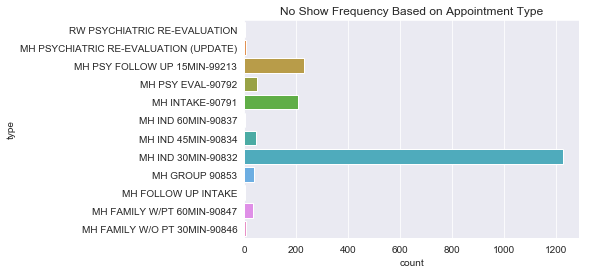

In [60]:
# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

no_show_df= df[df['status'] == 'No Show']
ns_type = no_show_df.sort_values('type',ascending=False)
sns.countplot(y=ns_type.type,data=ns_type).set_title('No Show Frequency Based on Appointment Type')

In [61]:
print(no_show_df.type.value_counts(normalize=True)*100)

MH IND 30MIN-90832                       66.485900
MH PSY FOLLOW UP 15MIN-99213             12.418655
MH INTAKE-90791                          11.171367
MH PSY EVAL-90792                         2.711497
MH IND 45MIN-90834                        2.386117
MH GROUP 90853                            2.060738
MH FAMILY W/PT 60MIN-90847                1.898048
MH FAMILY W/O PT 30MIN-90846              0.379610
MH PSYCHIATRIC RE-EVALUATION (UPDATE)     0.325380
MH FOLLOW UP INTAKE                       0.054230
MH IND 60MIN-90837                        0.054230
RW PSYCHIATRIC RE-EVALUATION              0.054230
Name: type, dtype: float64


Almost 70 percent of all of the No-Shows during the past six months have been during indivudal 30 minute appointments, while those are the most common, it is a good indicator on which appointment types we need to put the most focus to.

To gain a better understanding of whats going on behind the scenes, I generated a few bar charts and a pivot table to show the frequencies among, time of day,day of week and age range. The vast majority of all clients(no-show,seen/billed,etc) are located in hempstead, making it an minimal factor in this analysis.

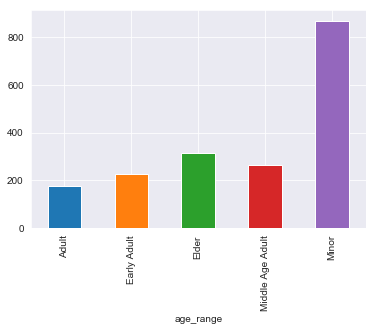

In [62]:
no_show_df.groupby('age_range').size().plot(kind='bar')

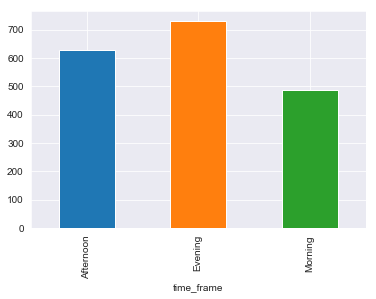

In [63]:
no_show_df.groupby('time_frame').size().plot(kind='bar')

In [64]:
no_show_df.pivot_table(index=['time_frame'],columns=['day_of_week'],aggfunc='size',fill_value=0)

day_of_week,0,1,2,3,4,5
time_frame,,,,,,
Afternoon,164,91,184,113,54,23
Evening,202,212,142,175,0,0
Morning,100,89,118,36,117,29


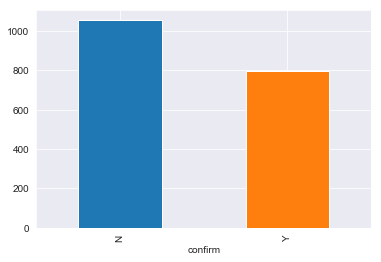

In [65]:
no_show_df.groupby('confirm').size().plot(kind='bar')

In [66]:
no_show_df.confirm.value_counts()

N    1054
Y     795
Name: confirm, dtype: int64

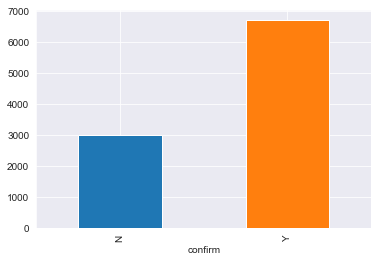

In [67]:
seen_billed = df[df.status=='Seen/Billed']
seen_billed.groupby('confirm').size().plot(kind='bar')

In [68]:
seen_billed.confirm.value_counts()

Y    6702
N    2985
Name: confirm, dtype: int64

Here we take a look at the frequency of the therapist/provider of the clients of all the No-Show appointments. The frequency varies dramtacially which will require further analysis to understand the actual percentage of the therapist No-Show appointments in comparison to all their appointments. With that being said there are a few therapist who stand out, showing up dramatically more frequently then others. Those therapist we should look into further first. 

Text(0.5, 1.0, 'Therapist No Show Frequency')

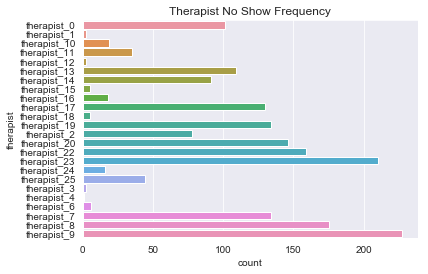

In [69]:
ns_therapist = no_show_df.sort_values('therapist',ascending=True)
sns.countplot(y=ns_therapist.therapist,data=ns_therapist).set_title('Therapist No Show Frequency')

In [70]:
no_show_df.therapist.value_counts()

therapist_9     227
therapist_23    210
therapist_8     175
therapist_22    159
therapist_20    146
therapist_19    134
therapist_7     134
therapist_17    130
therapist_13    109
therapist_0     101
therapist_14     91
therapist_2      78
therapist_25     44
therapist_11     35
therapist_10     19
therapist_16     18
therapist_24     16
therapist_6       6
therapist_18      5
therapist_15      5
therapist_1       2
therapist_3       2
therapist_12      2
therapist_4       1
Name: therapist, dtype: int64

In [72]:
therapist_9 = df[df.therapist == 'therapist_9']
print(therapist_9.status.value_counts(normalize=True)*100)

Seen/Billed        57.705479
No Show            19.434932
Cancelled          17.722603
Not Seen/Billed     3.681507
Rescheduled         1.027397
Late Cancelled      0.428082
Name: status, dtype: float64


In [73]:
therapist_23 = df[df.therapist =='therapist_23']
print(therapist_23.status.value_counts(normalize=True)*100)

Seen/Billed        58.141674
No Show            19.319227
Cancelled          17.571297
Not Seen/Billed     2.667893
Rescheduled         2.023919
Late Cancelled      0.275989
Name: status, dtype: float64


Here we realize that the two most frequently seen...or not seen therapist in No-Show appointments actually have No-Shows to around 20 percent of all their appointments. Indicating their might be some underlying details there that needed to be further analyzed in comparison to the other therapist

In [76]:
df.status.unique()

array(['No Show', 'Seen/Billed', 'Other'], dtype=object)

In [77]:
df.status = df.status.str.replace('Rescheduled','Other')
df.status = df.status.str.replace('Cancelled','Other')
df.status = df.status.str.replace('Late Cancelled','No Show')
df.status = df.status.str.replace('Not Seen/Billed','Other')
df.status = df.status.str.replace('Admin Hold','Other')
df.status = df.status.str.replace('Late Other','Other')

(I changed rescheduled,cancelled,later other and admin hold status of appointment to other as they were all a type of missed appointment that didnt cost the agency money)

Because most of the clients are reoccuring, I thought it would be beneficial to collect all of their information per account and gather up total of each appointment status as well as total and calculate their percentage.

In [78]:
clients = df.pivot_table(index=['account'], columns='status', 
                        aggfunc='size', fill_value=0)
clients['Total'] = clients['No Show']+clients['Other']+clients['Seen/Billed']
clients['Seen/Billed %'] = clients['Seen/Billed']/clients['Total']*100
clients['Other %'] = clients['Other']/clients['Total']*100
clients['No Show %'] = clients['No Show']/clients['Total']*100
clients = clients.reset_index()
clients.sort_values('No Show',ascending=False).head()

status,account,No Show,Other,Seen/Billed,Total,Seen/Billed %,Other %,No Show %
1098,115760,11,2,11,24,45.833333,8.333333,45.833333
622,114495,10,6,11,27,40.740741,22.222222,37.037037
623,114499,10,8,11,29,37.931034,27.586207,34.482759
33,100927,10,9,22,41,53.658537,21.951220,24.390244
305,111312,10,5,16,31,51.612903,16.129032,32.258065


In [79]:
print('Amount of clients who have missed 3 or more appointments: ',clients[clients['No Show'] >= 3].shape[0])
print('Amount of clients who have missed 5 or more appointments: ',clients[clients['No Show'] >= 5].shape[0])

Amount of clients who have missed 3 or more appointments:  243
Amount of clients who have missed 5 or more appointments:  70


In [87]:
clients.describe()

status,account,No Show,Other,Seen/Billed,Total,Seen/Billed %,Other %,No Show %
count,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000
mean,113595.334991,1.149161,2.633313,6.020510,9.802983,48.582394,33.219146,18.198461
std,3634.916592,1.561389,2.682129,6.190404,8.676272,32.585913,30.048895,28.535173
min,100017.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,112712.000000,0.000000,1.000000,1.000000,2.000000,21.428571,11.764706,0.000000
50%,115167.000000,1.000000,2.000000,4.000000,7.000000,55.000000,26.666667,5.882353
75%,115909.000000,2.000000,4.000000,10.000000,16.000000,73.333333,45.454545,23.076923
max,116634.000000,11.000000,21.000000,32.000000,50.000000,100.000000,100.000000,100.000000


As we can see 243 of the clients have No-Showed 3 or more appointments, with 70 of them having 5 or more No-Shows and 5 clients with 10 or more No-Show appointments. Making it clear than many of these No-Show appointments are from repeat offenders.

Here we gathered the total of therapists percentage based on appointment. Learning that average therapist No-Show percentage is 10% indicating that those who have a higher percentage could be a factor in the clients No-Show status.

In [80]:
therapist = df.pivot_table(index=['therapist'],columns=['status'],aggfunc='size',fill_value=0)
therapist['Total'] = therapist['No Show']+therapist['Other']+therapist['Seen/Billed']
therapist['Therapist No Show %'] = therapist['No Show']/therapist['Total']*100
therapist['Therapist Other %'] = therapist['Other']/therapist['Total']*100
therapist['Therapist Seen/Billed %'] = therapist['Seen/Billed']/therapist['Total']*100
rename_cols = {'No Show': 'Therapist-No Shows',
               'Other':'Therapist-Other',
               'Seen/Billed':'Therapist-Seen/Billed',
               'Total':'Therapist-Total'}
therapist.rename(rename_cols,axis=1,inplace=True)
therapist = therapist.reset_index()
therapist.sort_values('Therapist-No Shows',ascending=False).head(10)

status,therapist,Therapist-No Shows,Therapist-Other,Therapist-Seen/Billed,Therapist-Total,Therapist No Show %,Therapist Other %,Therapist Seen/Billed %
25,therapist_9,227,267,674,1168,19.434932,22.859589,57.705479
16,therapist_23,210,245,632,1087,19.319227,22.539098,58.141674
24,therapist_8,175,172,758,1105,15.837104,15.565611,68.597285
15,therapist_22,159,285,678,1122,14.171123,25.401070,60.427807
13,therapist_20,146,397,584,1127,12.954747,35.226264,51.818988
23,therapist_7,134,295,751,1180,11.355932,25.000000,63.644068
11,therapist_19,134,562,1076,1772,7.562077,31.715576,60.722348
9,therapist_17,130,290,637,1057,12.298959,27.436140,60.264901
5,therapist_13,109,276,635,1020,10.686275,27.058824,62.254902
0,therapist_0,101,215,657,973,10.380267,22.096608,67.523124


In [81]:
therapist.sort_values('Therapist No Show %',ascending=False).head(5)

status,therapist,Therapist-No Shows,Therapist-Other,Therapist-Seen/Billed,Therapist-Total,Therapist No Show %,Therapist Other %,Therapist Seen/Billed %
1,therapist_1,2,3,5,10,20.000000,30.000000,50.000000
25,therapist_9,227,267,674,1168,19.434932,22.859589,57.705479
16,therapist_23,210,245,632,1087,19.319227,22.539098,58.141674
24,therapist_8,175,172,758,1105,15.837104,15.565611,68.597285
15,therapist_22,159,285,678,1122,14.171123,25.401070,60.427807


In [82]:
therapist.describe()

status,Therapist-No Shows,Therapist-Other,Therapist-Seen/Billed,Therapist-Total,Therapist No Show %,Therapist Other %,Therapist Seen/Billed %
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,71.115385,162.961538,372.576923,606.653846,10.022555,29.410267,60.567177
std,73.435320,168.044394,329.965716,545.819453,5.197192,16.861809,15.007530
min,0.000000,1.000000,0.000000,1.000000,0.000000,9.090909,0.000000
25%,5.000000,17.000000,29.500000,48.000000,7.691760,22.301441,57.814528
50%,39.500000,131.500000,354.500000,545.000000,9.799700,25.000000,63.400981
75%,133.000000,273.750000,652.000000,1100.500000,12.649208,31.376518,68.493418
max,227.000000,562.000000,1076.000000,1772.000000,20.000000,100.000000,81.818182


In [83]:
df = pd.merge(left=df,right=clients,how='left')
df = pd.merge(left=df,right=therapist,how='left')

In [88]:
df.head()

,account,confirm,status,date,time,city,sex,type,therapist,age,...,Seen/Billed %,Other %,No Show %,Therapist-No Shows,Therapist-Other,Therapist-Seen/Billed,Therapist-Total,Therapist No Show %,Therapist Other %,Therapist Seen/Billed %
0,100017,N,No Show,2019-01-28,14:00:00,HEMPSTEAD,M,MH INTAKE-90791,therapist_23,59,...,0.000000,0.000000,100.000000,210,245,632,1087,19.319227,22.539098,58.141674
1,100072,Y,Seen/Billed,2019-01-04,15:30:00,UNIONDALE,F,MH IND 30MIN-90832,therapist_20,60,...,58.823529,26.470588,14.705882,146,397,584,1127,12.954747,35.226264,51.818988
2,100072,Y,Seen/Billed,2019-01-07,15:00:00,UNIONDALE,F,MH PSY FOLLOW UP 15MIN-99213,therapist_25,60,...,58.823529,26.470588,14.705882,44,558,591,1193,3.688181,46.772842,49.538977
3,100072,N,Seen/Billed,2019-01-11,15:30:00,UNIONDALE,F,MH IND 30MIN-90832,therapist_20,60,...,58.823529,26.470588,14.705882,146,397,584,1127,12.954747,35.226264,51.818988
4,100072,Y,Seen/Billed,2019-01-17,15:00:00,UNIONDALE,F,MH FAMILY W/PT 60MIN-90847,therapist_20,60,...,58.823529,26.470588,14.705882,146,397,584,1127,12.954747,35.226264,51.818988


In [61]:
df.columns

Index(['account', 'confirm', 'status', 'date', 'time', 'city', 'sex', 'type',
       'therapist', 'age', 'day_of_week', 'time_frame', 'age_range', 'month',
       'No Show', 'Other', 'Seen/Billed', 'Total', 'Seen/Billed %', 'Other %',
       'No Show %', 'Therapist-No Shows', 'Therapist-Other',
       'Therapist-Seen/Billed', 'Therapist-Total', 'Therapist No Show %',
       'Therapist Other %', 'Therapist Seen/Billed %'],
      dtype='object')

In [89]:
df.loc[df.Total==1,'type'].value_counts()

MH INTAKE-90791                          237
MH PSY FOLLOW UP 15MIN-99213              32
MH IND 30MIN-90832                        24
MH PSY EVAL-90792                         24
MH PSYCHIATRIC RE-EVALUATION (UPDATE)      2
RW PSYCHIATRIC RE-EVALUATION               1
Name: type, dtype: int64

In [90]:
no_show_2 = df[df.status =='No Show']
no_show_2.dtypes

account                             int64
confirm                            object
status                             object
date                       datetime64[ns]
time                               object
city                               object
sex                                object
type                               object
therapist                          object
age                                 int64
day_of_week                         int64
time_frame                         object
age_range                          object
month                               int64
No Show                             int64
Other                               int64
Seen/Billed                         int64
Total                               int64
Seen/Billed %                     float64
Other %                           float64
No Show %                         float64
Therapist-No Shows                  int64
Therapist-Other                     int64
Therapist-Seen/Billed             

In [65]:
no_show_2[['No Show','Other','Seen/Billed','Total','Seen/Billed %','Other %','No Show %','Therapist-No Shows','Therapist-Other','Therapist-Seen/Billed','Therapist-Total','Therapist No Show %','Therapist Other %','Therapist Seen/Billed %']].describe()

,No Show,Other,Seen/Billed,Total,Seen/Billed %,Other %,No Show %,Therapist-No Shows,Therapist-Other,Therapist-Seen/Billed,Therapist-Total,Therapist No Show %,Therapist Other %,Therapist Seen/Billed %
count,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.000000,1849.00000,1849.000000,1849.000000,1849.000000,1849.000000
mean,3.269335,3.958356,8.504056,15.731747,46.488307,23.886762,29.624931,144.029746,275.505679,656.83775,1076.373175,13.325540,25.160541,61.513918
std,2.261559,3.203065,6.292054,9.506347,22.695616,14.801300,24.433856,56.025298,119.818284,179.74934,298.546603,4.174169,6.118015,5.515065
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.500000,1.000000,1.000000,5.00000,10.000000,3.688181,9.090909,43.902439
25%,1.000000,2.000000,3.000000,8.000000,33.333333,14.285714,13.888889,109.000000,215.000000,632.00000,1020.000000,10.380267,22.539098,58.141674
50%,3.000000,3.000000,8.000000,16.000000,50.000000,23.809524,23.076923,134.000000,267.000000,657.00000,1105.000000,12.765957,24.369748,60.427807
75%,4.000000,6.000000,13.000000,22.000000,62.962963,33.333333,33.333333,175.000000,290.000000,678.00000,1168.000000,15.837104,27.436140,65.691489
max,11.000000,21.000000,32.000000,50.000000,96.153846,85.714286,100.000000,227.000000,562.000000,1076.00000,1772.000000,20.000000,51.219512,81.818182


In [91]:
seen_billed = df[df.status=='Seen/Billed']
seen_billed[['No Show','Other','Seen/Billed','Total','Seen/Billed %','Other %','No Show %','Therapist-No Shows','Therapist-Other','Therapist-Seen/Billed','Therapist-Total','Therapist No Show %','Therapist Other %','Therapist Seen/Billed %']].describe()

,No Show,Other,Seen/Billed,Total,Seen/Billed %,Other %,No Show %,Therapist-No Shows,Therapist-Other,Therapist-Seen/Billed,Therapist-Total,Therapist No Show %,Therapist Other %,Therapist Seen/Billed %
count,9687.000000,9687.000000,9687.000000,9687.000000,9687.000000,9687.000000,9687.000000,9687.000000,9687.000000,9687.000000,9687.000000,9687.000000,9687.000000,9687.000000
mean,1.623206,4.174254,12.381646,18.179106,68.387893,22.738681,8.873426,125.373490,287.760813,653.565294,1066.699597,11.741430,26.226006,62.032564
std,1.909492,3.106843,6.476167,8.575353,16.381718,13.235804,9.948135,56.474212,147.667197,218.664474,365.142094,4.196262,7.299442,6.020598
min,0.000000,0.000000,1.000000,1.000000,11.111111,0.000000,0.000000,0.000000,1.000000,5.000000,10.000000,0.000000,9.090909,43.902439
25%,0.000000,2.000000,8.000000,12.000000,57.692308,13.333333,0.000000,91.000000,174.000000,591.000000,973.000000,9.308511,22.539098,58.141674
50%,1.000000,4.000000,12.000000,18.000000,68.750000,21.875000,5.882353,134.000000,276.000000,657.000000,1105.000000,10.924370,25.000000,60.722348
75%,2.000000,6.000000,16.000000,24.000000,80.000000,31.578947,13.636364,159.000000,295.000000,751.000000,1168.000000,14.171123,27.436140,67.523124
max,11.000000,21.000000,32.000000,50.000000,100.000000,80.000000,66.666667,227.000000,562.000000,1076.000000,1772.000000,20.000000,51.219512,81.818182


After gathering more numeric information from the clients and their respected therapist, we're able to gain a much better understaning of percentages among No-Show appointments. These clients No-Show percentage and Other percentage tend to be very similar(around 25%) creating a potential assumption, that clients who No-Show frequently also cancel or reschedule frequently as well. On top of this information, we learned that the therapist of frequently No-Show clients tend to have a No-Show percentage of 13 and Other percentage of 25. To dive in a little deeper, it could be beneficial break all of the No-Show clients into smaller groups based on common similarities and see if this information is reinforced or disputed. 

Before doing so, it is necessary to compare No-Shows to Seen/Billed appointments to see if these percentages and commonalities are among all appointments or just No-Shows. Comparing No-Show information to that of Seen/Billed appointments we learn some valueable information. Most importantly the among Seen/Billed appointments, those clients average No-Show percentage is around 8%, siginicantly lower than that of No-Show appointments which as previously stated is around 25%.

In [87]:
no_show_2 =no_show_2._get_numeric_data()
no_show_2.drop_duplicates(subset='account',inplace=True)
no_show_2.head()

,account,age,day_of_week,month,No Show,Other,Seen/Billed,Total,Seen/Billed %,Other %,No Show %,Therapist-No Shows,Therapist-Other,Therapist-Seen/Billed,Therapist-Total,Therapist No Show %,Therapist Other %,Therapist Seen/Billed %
0,100017,59,0,1,1,0,0,1,0.000000,0.000000,100.000000,210,245,632,1087,19.319227,22.539098,58.141674
7,100072,60,0,2,5,9,20,34,58.823529,26.470588,14.705882,146,397,584,1127,12.954747,35.226264,51.818988
45,100086,64,0,1,6,7,13,26,50.000000,26.923077,23.076923,210,245,632,1087,19.319227,22.539098,58.141674
89,100134,48,0,4,3,7,16,26,61.538462,26.923077,11.538462,210,245,632,1087,19.319227,22.539098,58.141674
97,100277,63,1,4,1,1,0,2,0.000000,50.000000,50.000000,109,276,635,1020,10.686275,27.058824,62.254902


In [75]:
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [88]:
no_show_2.columns

Index(['account', 'age', 'day_of_week', 'month', 'No Show', 'Other',
       'Seen/Billed', 'Total', 'Seen/Billed %', 'Other %', 'No Show %',
       'Therapist-No Shows', 'Therapist-Other', 'Therapist-Seen/Billed',
       'Therapist-Total', 'Therapist No Show %', 'Therapist Other %',
       'Therapist Seen/Billed %'],
      dtype='object')

In [89]:
columns = no_show_2.columns

In [90]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(no_show_2)
no_show_2 = pd.DataFrame(scaled_df,columns=columns)

C:\Users\jboni\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jboni\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


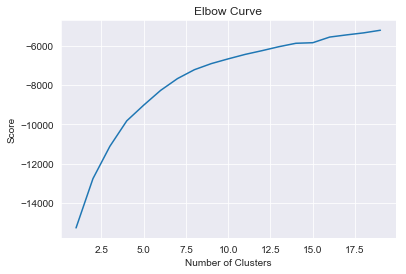

In [91]:
k = range(1,20)

kmeans = [KMeans(n_clusters=i) for i in k]
score =[kmeans[i].fit(no_show_2[no_show_2.columns[1:]]).score(no_show_2[no_show_2.columns[1:]]) for i in range(len(kmeans))]

pl.plot(k,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [92]:
cluster = KMeans(n_clusters=3)

no_show_2['cluster'] = cluster.fit_predict(no_show_2[no_show_2.columns[1:]])

In [93]:
len(no_show_2.columns)

19

In [94]:
pca = PCA(n_components=2)
no_show_2['x'] = pca.fit_transform(no_show_2.iloc[:,1:19])[:,0]
no_show_2['y'] = pca.fit_transform(no_show_2.iloc[:,1:19])[:,1]

In [95]:
no_show_2 = no_show_2.reset_index()
no_show_2.head(1)

,index,account,age,day_of_week,month,No Show,Other,Seen/Billed,Total,Seen/Billed %,...,Therapist-No Shows,Therapist-Other,Therapist-Seen/Billed,Therapist-Total,Therapist No Show %,Therapist Other %,Therapist Seen/Billed %,cluster,x,y
0,0,-3.537313,1.782213,-1.255711,-1.304169,-0.670849,-1.052479,-1.10201,-1.231062,-1.6066,...,1.271156,-0.257227,-0.155273,0.040128,1.535549,-0.413267,-0.654559,2,-3.512193,-1.14778


Through the descriptive statistics of the clusters,we learn that the biggest cluster of No-Show appointments(majority of No-Show appointments) reinforced our previous knowledge. In this cluster the No-Show and Other percentage of clients and therapist is almost identical to that of the general group. We also learn that the majority of no-shows in this cluster share similarities of typically being a minor, individual 30 min appointment type and they tend to fall Monday-Wednesday as well as more frequently in the evening and afternoon. With this information we can properly assume that the status of No-Show can more likely be assumed based on that clients attendance history, type of appointment and age range.

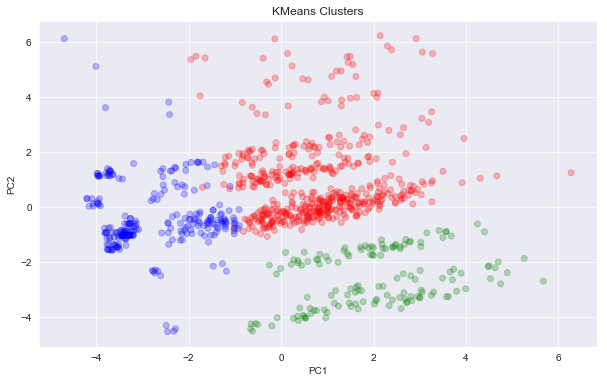

In [96]:
import matplotlib.pyplot as plt

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in cluster.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="x",y="y", data=no_show_2,
            alpha=0.25,color = kmeans_colors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters")
plt.show()

In [104]:
no_show_2.head(1)

,index,account,age,day_of_week,month,No Show,Other,Seen/Billed,Total,Seen/Billed %,...,Therapist-No Shows,Therapist-Other,Therapist-Seen/Billed,Therapist-Total,Therapist No Show %,Therapist Other %,Therapist Seen/Billed %,cluster,x,y
0,0,-3.537313,1.782213,-1.255711,-1.304169,-0.670849,-1.052479,-1.10201,-1.231062,-1.6066,...,1.271156,-0.257227,-0.155273,0.040128,1.535549,-0.413267,-0.654559,2,-3.512193,-1.14778


In [106]:
no_show = no_show_df.drop_duplicates(subset='account').reset_index()

In [107]:
no_show.head(1)

,index,account,confirm,status,date,time,city,sex,type,therapist,age,day_of_week,time_frame,age_range,month
0,0,100017,N,No Show,2019-01-28,14:00:00,HEMPSTEAD,M,MH INTAKE-90791,"VAZQUEZ, MSW,-BI, CASAC-T,LIDUVINA",59,0,Afternoon,Elder,1


In [108]:
cluster_cols = ['index','cluster','x','y']
no_show = pd.merge(left=no_show,right=no_show_2[cluster_cols],how='left')

In [ ]:
no_show = pd.merge(left=no_show,right=clients,how='left')
no_show = pd.merge(left=no_show,right=therapist,how='left')

In [118]:
no_show.cluster.value_counts()

1.0    212
2.0     99
0.0     63
Name: cluster, dtype: int64

In [121]:
most_noshow = no_show[no_show.cluster == 1.0]
most_noshow.age_range.value_counts()

Minor               84
Elder               45
Middle Age Adult    36
Adult               25
Early Adult         22
Name: age_range, dtype: int64

In [122]:
most_noshow.type.value_counts()

MH IND 30MIN-90832                       143
MH INTAKE-90791                           28
MH PSY FOLLOW UP 15MIN-99213              24
MH FAMILY W/PT 60MIN-90847                 5
MH GROUP 90853                             3
MH PSY EVAL-90792                          3
MH IND 45MIN-90834                         2
MH PSYCHIATRIC RE-EVALUATION (UPDATE)      1
MH FAMILY W/O PT 30MIN-90846               1
RW PSYCHIATRIC RE-EVALUATION               1
Name: type, dtype: int64

In [359]:
most_noshow.month.value_counts()

1    48
3    41
2    39
4    32
6    28
5    24
Name: month, dtype: int64

In [319]:
most_noshow.day_of_week.value_counts()

0    57
2    49
1    44
3    35
4    24
5     3
Name: day_of_week, dtype: int64

In [360]:
most_noshow.pivot_table(index=['time_frame'],columns=['day_of_week'],aggfunc='size',fill_value=0)

day_of_week,0,1,2,3,4,5
time_frame,,,,,,
Afternoon,22,12,16,14,7,1
Evening,21,23,21,18,0,0
Morning,14,9,12,3,17,2


In [123]:
most_noshow.describe()

,account,age,day_of_week,month,cluster,x,y,No Show,Other,Seen/Billed,...,Seen/Billed %,Other %,No Show %,Therapist-No Shows,Therapist-Other,Therapist-Seen/Billed,Therapist-Total,Therapist No Show %,Therapist Other %,Therapist Seen/Billed %
count,212.000000,212.000000,212.000000,212.000000,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,109741.721698,30.410377,1.688679,3.136792,1.0,0.804825,0.963631,2.452830,4.033019,8.542453,...,48.829440,25.427341,25.743219,144.183962,287.311321,660.773585,1092.268868,13.199351,25.833675,60.966974
std,3789.244265,19.139956,1.393031,1.696153,0.0,1.107040,1.528552,1.964771,3.413639,6.555132,...,24.390706,15.551066,25.261389,54.017016,118.455372,158.742289,263.753472,4.269002,6.582561,5.562517
min,100086.000000,7.000000,0.000000,1.000000,1.0,-1.952516,-0.898158,1.000000,0.000000,0.000000,...,0.000000,0.000000,2.500000,5.000000,20.000000,66.000000,91.000000,3.688181,15.565611,49.538977
25%,107964.250000,14.000000,0.000000,2.000000,1.0,-0.039133,-0.098299,1.000000,1.000000,3.000000,...,35.750000,15.109890,9.880952,109.000000,245.000000,632.000000,1057.000000,10.686275,22.539098,58.141674
50%,110825.500000,25.000000,2.000000,3.000000,1.0,0.812322,0.512330,2.000000,3.000000,8.000000,...,53.752345,25.000000,17.914439,134.000000,276.000000,657.000000,1105.000000,12.298959,25.000000,60.427807
75%,112756.250000,45.250000,3.000000,4.000000,1.0,1.511468,1.483809,3.000000,6.000000,13.000000,...,66.666667,35.341556,31.748727,175.000000,295.000000,678.000000,1168.000000,15.837104,27.436140,63.644068
max,114495.000000,83.000000,5.000000,6.000000,1.0,3.956831,6.235283,10.000000,21.000000,30.000000,...,90.909091,66.666667,100.000000,227.000000,562.000000,1076.000000,1772.000000,19.434932,46.772842,72.527473


As an experiment, I changed all appointments where the client was seen by a therapist to "Seen" and all the appointments where the client was not seen to "Not Seen" and will attempt to predict the status of the appointment. Although this wont give us an exact understanding of the No-Show issue, this will give us an idea if a client being seen and not seen can be decided based on the given variables which inturn can give us more insight as to where to pay our attention to as a client being seen is much better for not only the agency's revenue but for the clients progress as well rather than if he/she reschedueles, cancels or no shows.

In [124]:
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
exp = df.copy()
exp['status'] = exp['status'].str.replace('Other','Not Seen')
exp['status'] = exp['status'].str.replace('No Show','Not Seen')
exp['status'] = exp['status'].str.replace('Seen/Billed','Seen')
exp.status.value_counts()

Seen        9687
Not Seen    6086
Name: status, dtype: int64

In [85]:
col_drop= ['account','date','time','age']
exp.drop(col_drop,axis=1,inplace=True)
exp.head(1)

,confirm,status,city,sex,type,therapist,day_of_week,time_frame,age_range,month,...,Seen/Billed %,Other %,No Show %,Therapist-No Shows,Therapist-Other,Therapist-Seen/Billed,Therapist-Total,Therapist No Show %,Therapist Other %,Therapist Seen/Billed %
0,N,Not Seen,HEMPSTEAD,M,MH INTAKE-90791,therapist_23,0,Afternoon,Elder,1,...,0.0,0.0,100.0,210,245,632,1087,19.319227,22.539098,58.141674


In [86]:
exp['status'] = exp['status'].apply(
    lambda x: 0 if x == 'Not Seen' else 1)
exp['confirm'] = exp['confirm'].apply(
    lambda x: 0 if x == 'N' else 1)
exp = pd.get_dummies(exp)
exp.head()

,confirm,status,day_of_week,month,No Show,Other,Seen/Billed,Total,Seen/Billed %,Other %,...,therapist_therapist_8,therapist_therapist_9,time_frame_Afternoon,time_frame_Evening,time_frame_Morning,age_range_Adult,age_range_Early Adult,age_range_Elder,age_range_Middle Age Adult,age_range_Minor
0,0,0,0,1,1,0,0,1,0.000000,0.000000,...,0,0,1,0,0,0,0,1,0,0
1,1,1,4,1,5,9,20,34,58.823529,26.470588,...,0,0,1,0,0,0,0,1,0,0
2,1,1,0,1,5,9,20,34,58.823529,26.470588,...,0,0,1,0,0,0,0,1,0,0
3,0,1,4,1,5,9,20,34,58.823529,26.470588,...,0,0,1,0,0,0,0,1,0,0
4,1,1,3,1,5,9,20,34,58.823529,26.470588,...,0,0,1,0,0,0,0,1,0,0


In [187]:
x = exp.drop('status',axis=1)
y= exp['status']

In [188]:
X_trn,X_tst,Y_trn,Y_tst = train_test_split(x,y,test_size=.4)

In [189]:
logreg = LogisticRegression()
logreg.fit(X_trn,Y_trn)
logreg.predict(X_tst)
print('accuracy on training data',logreg.score(X_trn, Y_trn))
print('accuracy on test data',logreg.score(X_tst, Y_tst))

C:\Users\jboni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy on training data 0.7532494980450174
accuracy on test data 0.7519809825673535


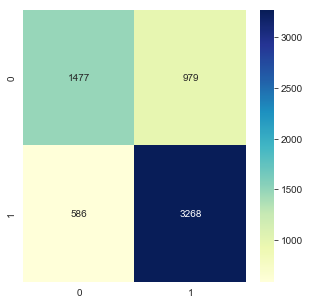

In [190]:
predictions = logreg.predict(X_tst)
cm = metrics.confusion_matrix(Y_tst,predictions)
plt.figure(figsize=[5,5])
sns.heatmap(cm, annot=True,cmap='YlGnBu', fmt='g')
plt.show()

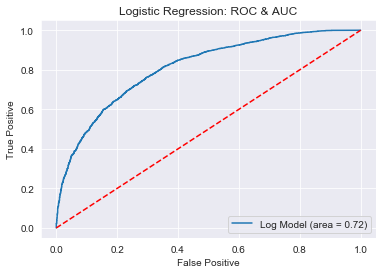

In [191]:
lr_roc_auc = metrics.roc_auc_score(Y_tst,predictions)
fpr, tpr, threshold = metrics.roc_curve(Y_tst,logreg.predict_proba(X_tst)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Log Model (area = %0.2f)' % lr_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Logistic Regression: ROC & AUC')
plt.legend(loc='lower right')
plt.show()

In [192]:
from sklearn.metrics import classification_report
print("Classification Report:")
print (classification_report(Y_tst,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65      2456
           1       0.77      0.85      0.81      3854

   micro avg       0.75      0.75      0.75      6310
   macro avg       0.74      0.72      0.73      6310
weighted avg       0.75      0.75      0.75      6310



In [193]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=5)
random_forest_model.fit(X_trn, Y_trn)
 
print('accuracy on training data',random_forest_model.score(X_trn, Y_trn))
print('accuracy on test data',random_forest_model.score(X_tst, Y_tst))

accuracy on training data 0.732220226143929
accuracy on test data 0.7169572107765452


In [194]:
df_feat_importances = pd.DataFrame(list(zip(x,random_forest_model.feature_importances_)), columns=['Feature','Importance']).head(8)
df_feat_importances.sort_values(by='Importance',ascending=False)

,Feature,Importance
7,Seen/Billed %,0.260744
0,confirm,0.201814
5,Seen/Billed,0.114804
6,Total,0.042846
3,No Show,0.030986
4,Other,0.022123
2,month,0.008833
1,day_of_week,0.002480


<BarContainer object of 8 artists>

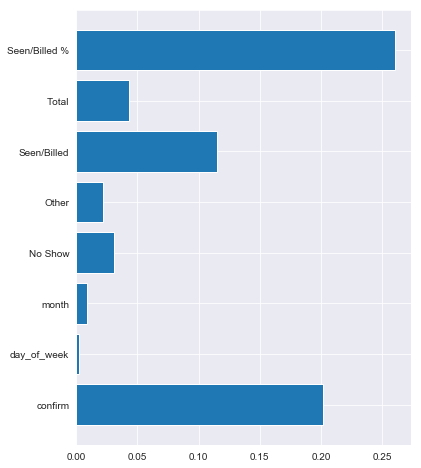

In [195]:
plt.figure(figsize=[6,8])
plt.barh(df_feat_importances['Feature'],df_feat_importances['Importance'])

In [196]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(n_estimators=50, max_depth=5, min_samples_leaf=100)
gbm_model.fit(X_trn, Y_trn)
 
print('accuracy on training data',gbm_model.score(X_trn, Y_trn))
print('accuracy on test data',gbm_model.score(X_tst, Y_tst))

accuracy on training data 0.765824791292402
accuracy on test data 0.7527733755942948


<BarContainer object of 8 artists>

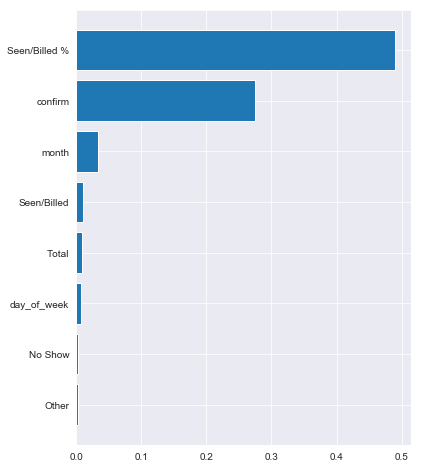

In [197]:
df_feat_importances_gbm = pd.DataFrame(list(zip(x,gbm_model.feature_importances_)), columns=['Feature','Importance']).head(8)
df_feat_importances_gbm.sort_values(by='Importance', inplace=True)
plt.figure(figsize=[6,8])
plt.barh(df_feat_importances_gbm['Feature'],df_feat_importances_gbm['Importance'])

In [220]:
from sklearn.model_selection import cross_val_score

In [235]:
cross_val_score(LogisticRegression(penalty='l1',solver='liblinear'),X_tst,Y_tst,cv=5)

array([0.84693878, 0.78350515, 0.8125    , 0.76041667, 0.77083333])

In [227]:
cross_val_score(RandomForestClassifier(n_estimators=50),X_tst,Y_tst,cv=5)

array([0.82653061, 0.81443299, 0.80208333, 0.76041667, 0.78125   ])

In [226]:
cross_val_score(GradientBoostingClassifier(),X_tst,Y_tst,cv=5)

array([0.81632653, 0.78350515, 0.79166667, 0.80208333, 0.79166667])

In this experiment we learned that we can predict whether a client will be seen or not based on all of the variables provided with a relatively high accuracy rate and a very low percentage of false negatives. We also learned that some of the factors that played the biggest indications on the prediction were the clients previous attendance. The clients status tends to be indicative on its previous behaviors, meaning clients that were seen more...well were seen more and those who missed appointments tended to do so frequently(confirming the reoccuring offender theory) which was formulated by their total of each status as well as overall total. This gives us great insight for therapist to pay close attention to clients who frequently miss, cancel or reschedule appointments, ask questions and try to gather more information from these clients to see how to better ensure their attendance.


Potentially, more importantly we learned that the clients confirmation of appointment played a huge role in this prediction. If a client confirmed they were going to the appointment they were more likly to be seen, as well as the contrary. 
While this information might sound simple and intituative, it can actually provide another solid foundation for tackling the No-Show problem. By implementing a strategy that requires clients to confirm "yes" they will be attending the appointment prior to designating a therapist to that time spot, the agency can better ensure the clients attendance. Requiring the client to confirm the day/time of appointment prior to booking that appointment will not only serve as a confirmation but also as a reminder. Without confirming, the slot wont be booked, the therapist wont be paid and the money wont be lost if the client doesnt show.

 Being that therapist with high no-show percentage also showed up frequently in no-show appointments these therapist should be required to ensure this confirmation as therapist to client communication is deeper and more meaningful than that between a secretary and client, ontop of the fact that the therapist can also reiterate how essential consistent attendance is for progress in mental health therapy.Since a big portion of the No-Shows are also minors, during this process therapist should try to improve parent communication and emphasize to these parents how detrimental missed appointments are to the childs progress. Therapist with high No-Show be monitored by supervisiors to make sure they are doing so and that rate doesnt increase. 

One concept to strongly consider if all else above fails is to begin dropping clients after they miss a certain amount of apointments in a given time period. Since we've learned that there is a pretty significant drop from 243 to 70 in number of No-Show between clients who've missed 3 or more and those who have missed 5 or more, that is a good indicator on which clients are beginning to miss way too many appointments. Although this is not best practice in means of social services, from a business standpoint and it would be best pratcice since these repeat offenders are making up the majority of the No-Shows.

Full disclosure to all my coders/data scientist reading this, this was my last of many attempts playing around with the parameters and columns I used for the Machine learning models. With all of them producing around the same level of accuracy and having the Seen/Billed% and Confirm as the most prevelant indicators. 